# bubble plot

In [12]:
library(ggplot2)
library(DOSE)
df = read.table("new_table.tsv",header=TRUE,sep="\t")
head(df)


,Description,logFDR,enrichment,Cluster
,<chr>,<dbl>,<dbl>,<chr>
1,antigen processing and presentation,4.037176,0.1250000,LTHSC.1
2,regulation of leukocyte mediated cytotoxicity,3.561490,0.1041667,LTHSC.1
3,regulation of viral entry into host cell,2.283192,0.0625000,LTHSC.1
4,cytoplasmic translation,1.724455,0.0625000,LTHSC.1
5,oxidative phosphorylation,1.609342,0.0625000,LTHSC.1
6,antigen processing and presentation,9.652138,0.1639344,LTHSC.2


In [11]:
df

Description,logFDR,enrichment,Cluster
<fct>,<dbl>,<dbl>,<fct>
antigen processing and presentation,4.037176,0.12500000,LTHSC.1
regulation of leukocyte mediated cytotoxicity,3.561490,0.10416667,LTHSC.1
regulation of viral entry into host cell,2.283192,0.06250000,LTHSC.1
cytoplasmic translation,1.724455,0.06250000,LTHSC.1
oxidative phosphorylation,1.609342,0.06250000,LTHSC.1
antigen processing and presentation,9.652138,0.16393443,LTHSC.2
positive regulation of T cell mediated cytotoxicity,7.692673,0.11475410,LTHSC.2
regulation of viral entry into host cell,5.274335,0.08196721,LTHSC.2
cytoplasmic translation,2.752601,0.06557377,LTHSC.2


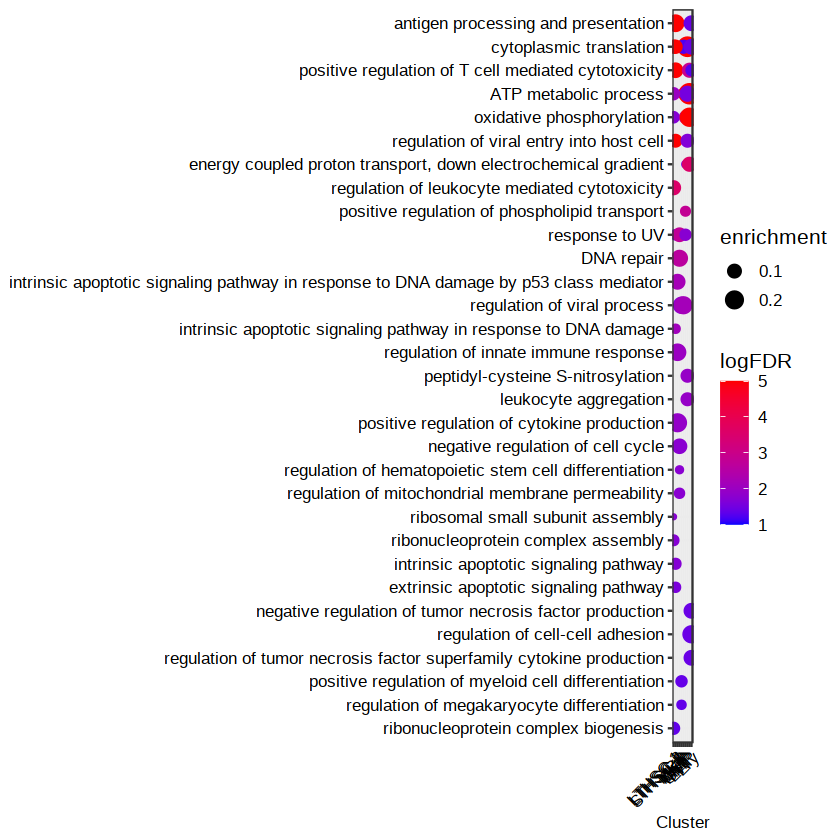

In [13]:

level = c("LTHSC.1","LTHSC.2","STHSC.1","STHSC.2","MPP","MKP","CMP","MEP","GMP","ERP","Ery")
## specifying Y-axis order
orderBy="logFDR"
idx <- order(df[[orderBy]], decreasing = T)
df$Description <- factor(df$Description,levels=rev(unique(df$Description[idx])))

## specifying X-axis order
df$Cluster <- factor(df$Cluster, levels=level)

## main plot fuction
ggplot(df, aes_string(x="Cluster", y="Description", size="enrichment", color="logFDR")) +
        geom_point() + scale_size_continuous(range = c(1, 5))+
        scale_color_continuous(low="blue", high="red", name = "logFDR",limits = c(1, 5),oob = scales::squish,
                guide=guide_colorbar(reverse=F)) +ylab(NULL)+theme_dose(10)+theme(axis.text.x = element_text(angle = 45, vjust =1, hjust=1),
                                                             text = element_text(size=12))
ggsave("NFIX_PU1_GO_v2.pdf",width=9,heigh=5,useDingbats=FALSE)